Katie Briggs
DSC550-302
KClustering

## 3. Clustering
The data for this portion of the assignment will be the Iris flower dataset. The dataset consists of 50 samples from each of three species of Iris, with four features measured from each sample.scikit-learn provides a function to load the dataset (no download required).

The Idea: Choosing k for k-means

Your objective here will be to assess the performance of k-means clustering on the Iris dataset. Recall that the number of clusters, k, is an input parameter to the k-means algorithm. A variety of measurements are available for estimating the optimal value of k. For this assignment, you will look at the sum of squared deviation (SSQ) and the gap statistic. Both of these criteria make use of the intuition that k-means tries to minimize variance (the distance or deviation of each point from each of the k clusters) by iteratively assigning points to their nearest clusters.

Choosing k with SSQ

The SSQ criterion is a direct application of the intuition that k-means tries to minimize variance. Recall that the SSQ criterion sweeps over a range of possible k values, with each value of k associated with a degree of deviation (the distance of each point from each of the k clusters). These deviations can be squared and summed to arrive at the “sum of squared deviation” (SSQ) for each value of k. Larger values of k are expected to continue to reduce the SSQ (because there are more clusters for points to be near, reducing their deviation). However, one could expect a leveling-off in the SSQ once the value of k exceeds the true number of clusters, as this would result in true clusters (that is, clusters actually present in the data) being separated. If, then, one plots the SSQ over a range of k values, this leveling-off point may produce a noticeable “elbow” in the plot. By this criterion, the estimated optimal value of k is that which occurs at this elbow point. While simple, the difficulty with this criterion is that often the elbow point is not distinctive or well-defined.

What to Provide

Your output should contain the following:

The SSQs computed fork values between 1 and 10 (inclusive). There should be one plot corresponding to the SSQs.
The gap statistics computed fork values between 1 and 10 (inclusive). There should be two plots corresponding to the gap statistics.
Given this output, respond to the following questions:

Where did you estimate the elbow point to be (between what values of k)? What value of k was typically estimated as optimal by the gap statistic? To adequately answer this question, consider generating both measures several times, as there may be some amount of variation in the value of k that they each estimate as optimal.
How close are the estimates generated by the elbow point and gap statistic to the number of species of Iris represented in the dataset?
Assuming we are trying to generate one cluster for each Iris species represented in the dataset, does one measure seem to be a consistently better criterion for choosing the value of k than the other? Why or why not?


In [79]:
# import libraries needed

import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import sys
import time
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [84]:
# create function 
# create kmeans using data and number of clusters
def sse_f(iris, n):
    sse = {}
    for k in range(1, n+1):
        kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(data)
        data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    return(sse)

In [85]:
# create function
# print results of clusters and SSE values 
def sse_p(sse_values):
    print('Clusters and with SSE Values')
    print('-'*40)
    for k,v in sse_values.items():
        print('Clusters: {} \tSSE: {}'.format(k,v))

In [86]:
# create function to find elbow point
def elbow_plt(sse):
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

Clusters and with SSE Values
----------------------------------------
Clusters: 1 	SSE: 681.3706
Clusters: 2 	SSE: 152.3479517603579
Clusters: 3 	SSE: 81.70628013582343
Clusters: 4 	SSE: 59.34876557610241
Clusters: 5 	SSE: 46.98506112266112
Clusters: 6 	SSE: 39.57886631746632
Clusters: 7 	SSE: 35.25750383733913
Clusters: 8 	SSE: 33.0136096065699
Clusters: 9 	SSE: 29.295542939903235
Clusters: 10 	SSE: 27.213400082760376


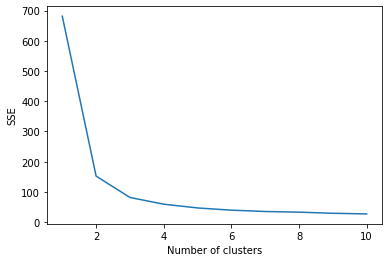

In [88]:


#Main function.  
def main():
    try:
        #Loading Iris dataset from sklearn datasets
        iris = load_iris()
        df = pd.DataFrame(iris.data, columns=iris['feature_names'])
        k = 10 
        #Pulling in other functions
        sse_values = sse_f(df, k)
        sse_p(sse_values)
        elbow_plt(sse_values)
    #Exception handling    
    except Exception as exception:
        print('exception')
        # print the traceback of the exception
        traceback.print_exc()
        # list name of exception and any arguments
        print('An exception of type {0} occurred.'.format(type(exception).__name__, exception.args)); 
main()

In [74]:
# find gap statistics 

In [75]:

# Reference:https://github.com/hevronig/ca4ls/blob/105e2f234ea46f3e64c0a823c998eb9fecc3da4b/gap.py to compute Gap Statistics
            # https://joey711.github.io/phyloseq/gap-statistic.html
            # https://joey711.github.io/phyloseq/gap-statistic.html#compute_gap_statistic


import scipy
import scipy.cluster.vq
import scipy.spatial.distance
import math
import numpy as np
from numpy.lib import scimath
dst = scipy.spatial.distance.euclidean

# create function to gather gap data
def gap(data, refs=None, nrefs=20, ks=range(1,11)):
    shape = data.shape
    if refs==None:
        tops = data.max(axis=0)
        bots = data.min(axis=0)
        dists = scipy.matrix(np.diag(tops-bots))
        rands = scipy.random.random_sample(size=(shape[0],shape[1],nrefs))
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs
# compute gap
    gaps = np.zeros((len(ks),))
    errors = np.zeros((len(ks),))
    labels = dict((el,[]) for el in ks)
    for (i,k) in enumerate(ks):
        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])
        labels[k] = kml

        refdisps = np.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = scimath.log(np.mean(refdisps))-scimath.log(disp)
        errors[i] = scimath.sqrt(sum(((scimath.log(refdisp)-np.mean(scimath.log(refdisps)))**2) \
                                for refdisp in refdisps)/float(nrefs)) * scimath.sqrt(1+1/nrefs)
    return gaps, labels, errors


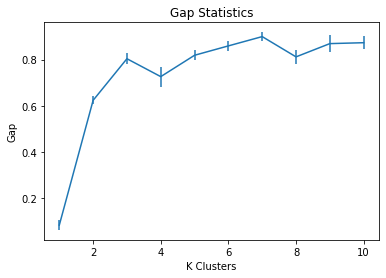

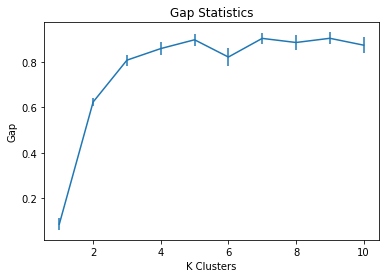

In [67]:
# create function to plot gap plot
def gap_stat_plt(gaps, errors):
    xval = range(1, len(gaps)+1)
    yval = gaps
    plt.errorbar(xval, yval, xerr= None, yerr = errors)
    plt.xlabel('K Clusters')
    plt.ylabel('Gap')
    plt.title('Gap Statistics')
    plt.show()
    
gaps, labels, errors = gap(data, refs = None, nrefs = 20, ks= range(1,11))

gap_stat_plt(gaps, errors)

gaps, labels, errors = gap(data, refs = None, nrefs = 30, ks= range(1,11))

gap_stat_plt(gaps, errors)

Excercise Three:

 1: The value of k between the elbow points was estimated to be k = 2. 

 2: 
The estimates of the values of k derived from figures 1 and 2 are nearly identical to that conveyed by the iris data set.
The graphs show point k to be three, and there are three species of flower in iris.

3: 
K Means test shows the point better than the other.  Gap statitics was difficult to understand.  
